In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
import numpy as np
import cv2


class Data:

  def __init__(self,zip_dir,out_dir):
    super().__init__()
    self.path_folder = out_dir
    self.sub_folder = None
    self.All_img = None
    self.unzip(zip_dir)
    direct = zip_dir.split('/')
    # print(direct)
    self.zip_name = direct[-1].split('.')[0]
    # print(zip_name)
    self.load()

  def unzip(self,Path):
   zip_file_path = f'{Path}'
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(self.path_folder)


  def load(self):
    path = f'{self.path_folder}{self.zip_name}/images'
    self.data = []
    a = os.listdir(path)
    for i in a:
      b = os.listdir(f'{path}/' + i)
      for j in b:
        self.data.append(f'{path}/' + i + '/' + j)


  def read(self,n):
    images = []
    for i in range(n):
     img = cv2.imread(self.data[i])
     img = self.preprocess(img)
     images.append(img)
    images = np.array(images)
    return images

  def preprocess(self,image):
    #normalize
    pixels = image.astype('float32')
    pixels /= 255.0
    #resize
    img_normalized = cv2.resize(pixels,(1024,1024))

    return img_normalized


In [ ]:
#Unzip , load , read folders

path_train = '/content/drive/MyDrive/WIDER dataset/WIDER_train.zip'
path_val = '/content/drive/MyDrive/WIDER dataset/WIDER_val.zip'
path_test = '/content/drive/MyDrive/WIDER dataset/WIDER_test.zip'
output = '/content/'

train_dataset = Data(path_train,output)
val_dataset = Data(path_val,output)
test_dataset = Data(path_test,output)

# train = train_dataset.read(10)
# val = val_dataset.read(1)
# test = test_dataset.read(1)

In [ ]:
# Remove all folder
!rm -R WIDER_train/
!rm -R WIDER_test/
!rm -R WIDER_val/

## Try 4

In [ ]:
!pip install MTCNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.7 MB/s eta 0:00:00


In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


1/1 [==============================] - 0s 172ms/step


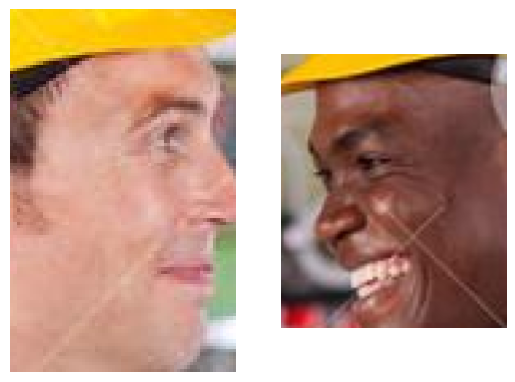

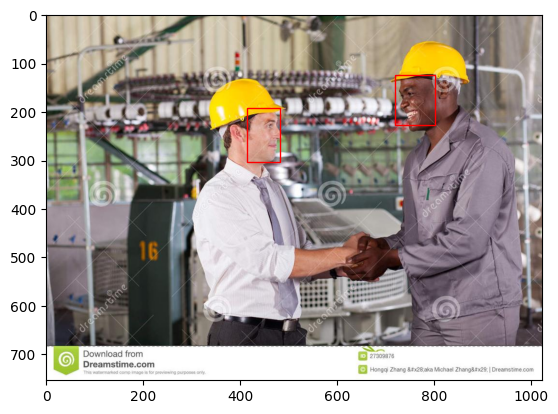

In [ ]:

# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

def pre(image):
    #normalize
    pixels = image.astype('float32')
    pixels /= 255.0
    #resize
    # img_normalized = cv2.resize(pixels,(1024,1024))
    return pixels


# draw each face separately
def draw_faces(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 data = pre(data)
 # plot each face as a subplot
 for i in range(len(result_list)):
 # get coordinates
  x1, y1, width, height = result_list[i]['box']
  x2, y2 = x1 + width, y1 + height
 # define subplot
  pyplot.subplot(1, len(result_list), i+1)
  pyplot.axis('off')
 # plot face
  pyplot.imshow(data[y1:y2, x1:x2])
 # show the plot
 pyplot.show()



# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
 # load the image
 data = pyplot.imread(filename)
 # plot the image
 pyplot.imshow(data)
 # get the context for drawing boxes
 ax = pyplot.gca()
 # plot each box
 for result in result_list:
 # get coordinates
  x, y, width, height = result['box']
 # create the shape
  rect = Rectangle((x, y), width, height, fill=False, color='red')
 # draw the box
  ax.add_patch(rect)
 # show the plot
pyplot.show()

filename = '/content/WIDER_test/images/1--Handshaking/1_Handshaking_Handshaking_1_144.jpg'

# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces
draw_faces(filename, faces)

# display faces on the original image
draw_image_with_boxes(filename, faces)